In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
df=pd.read_csv("exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [4]:
df.isna().sum()

date       0
Ex_rate    0
dtype: int64

In [5]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.dtypes

date       datetime64[ns]
Ex_rate           float64
dtype: object

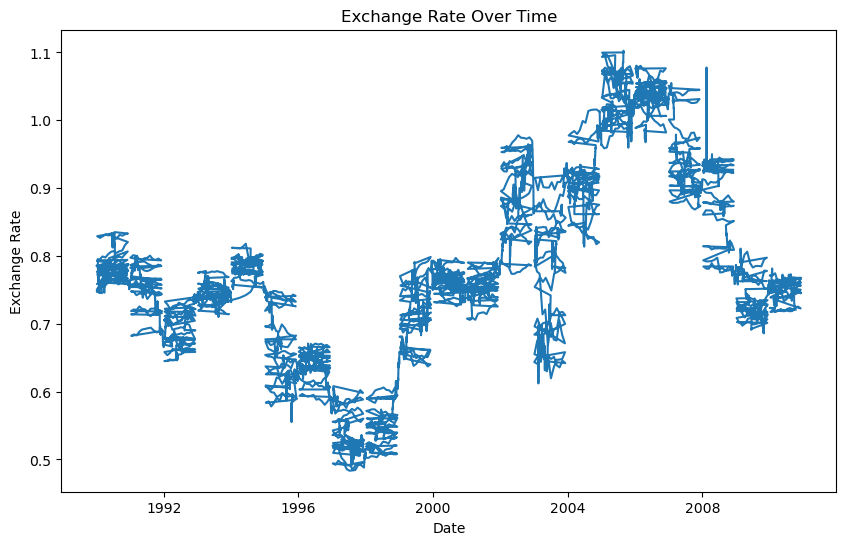

In [8]:
# Plot the time series for currency
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['Ex_rate'])
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

<Figure size 1200x600 with 0 Axes>

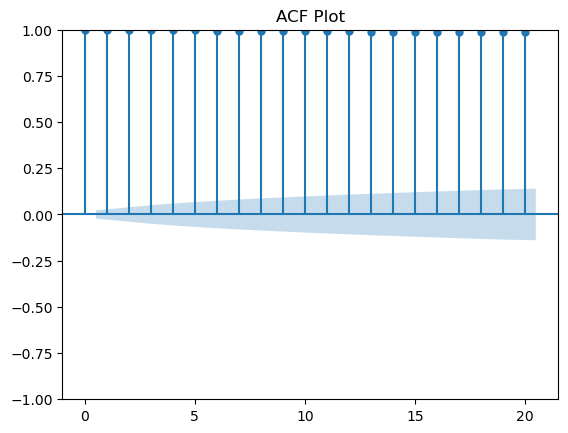

<Figure size 1200x600 with 0 Axes>

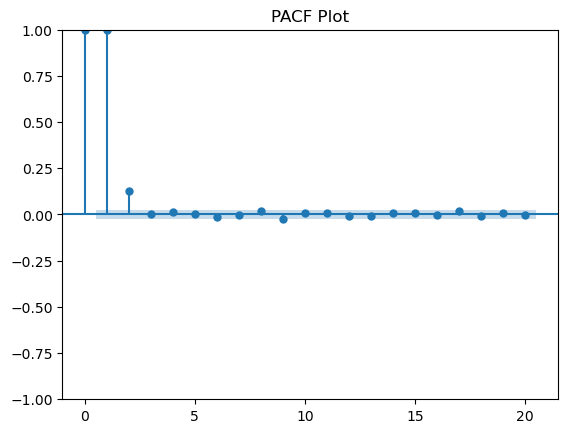

In [9]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(df['Ex_rate'], lags=20)
plt.title('ACF Plot')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Ex_rate'], lags=20)
plt.title('PACF Plot')
plt.show()

In [10]:
order=auto_arima(df['Ex_rate'])

In [11]:
order

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
# Fit the ARIMA model
model = ARIMA(df['Ex_rate'], order=(1,1,0))  # Specify p, d, q based on ACF and PACF plots
fit_model = model.fit()

# Perform out-of-sample forecasting
forecast = fit_model.forecast(steps=7)  # Specify the number of steps to forecast

In [13]:
forecast

7588    0.720825
7589    0.720825
7590    0.720825
7591    0.720825
7592    0.720825
7593    0.720825
7594    0.720825
Name: predicted_mean, dtype: float64

In [27]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Assuming df is your DataFrame containing the historical data
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)  # Splitting into 80% training and 20% testing



In [28]:
# Fit your model
model = ARIMA(train_data['Ex_rate'], order=(1, 1, 0))  # Specify p, d, q based on ACF and PACF plots
fit_model = model.fit()



In [29]:
# Forecast future values
forecast_steps = 7  # Forecasting for the next 7 days
forecast = fit_model.forecast(steps=forecast_steps)



In [17]:
# Compare with testing set

if test_data is not None:
    actual_values = test_data['Ex_rate'].tail(forecast_steps)  # Select the last 7 values from the testing set
    # Calculate error metrics
    mae = mean_absolute_error(actual_values, forecast)
    rmse = mean_squared_error(actual_values, forecast, squared=False)
    print("Mean Absolute Error:", mae)
    print("Root Mean Squared Error:", rmse)
else:
    print("No testing set available for comparison.")

Mean Absolute Error: 0.30302650578962975
Root Mean Squared Error: 0.3030305414776418


In [24]:
# Fit Exponential Smoothing model
seasonal_periods = 7  # Assuming weekly seasonality
model_exp_smooth = ExponentialSmoothing(train_data['Ex_rate'], seasonal='add', seasonal_periods=seasonal_periods).fit()

In [26]:
# Forecast future values using Exponential Smoothing
forecast_exp_smooth = model_exp_smooth.forecast(steps=7)

# Compare Exponential Smoothing forecast with testing set
if test_data is not None:
    # Calculate error metrics for Exponential Smoothing
    mae_exp_smooth = mean_absolute_error(actual_values, forecast_exp_smooth)
    rmse_exp_smooth = mean_squared_error(actual_values, forecast_exp_smooth, squared=False)
    print("\nExponential Smoothing Model Performance:")
    print("Mean Absolute Error:", mae_exp_smooth)
    print("Root Mean Squared Error:", rmse_exp_smooth)
else:
    print("No testing set available for Exponential Smoothing model.")



Exponential Smoothing Model Performance:
Mean Absolute Error: 0.30329799429514803
Root Mean Squared Error: 0.3033021848950016
